In [ ]:
from google.colab import files

# Upload the kaggle.json file that you downloaded
uploaded = files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d cihan063/autism-image-data
!unzip /content/autism-image-data.zip -d /content/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


InceptionV3

Found 2940 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Found 100 images belonging to 2 classes.


Epoch 1/25
92/92 [==============================] - ETA: 0s - loss: 0.5683 - accuracy: 0.7143

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 119s 871ms/step - loss: 0.5683 - accuracy: 0.7143 - val_loss: 1.0347 - val_accuracy: 0.5200
Epoch 2/25
92/92 [==============================] - 80s 850ms/step - loss: 0.4695 - accuracy: 0.7878 - val_loss: 0.5448 - val_accuracy: 0.8000
Epoch 3/25
92/92 [==============================] - 79s 813ms/step - loss: 0.4289 - accuracy: 0.8078 - val_loss: 0.6020 - val_accuracy: 0.8000
Epoch 4/25
92/92 [==============================] - 77s 810ms/step - loss: 0.4050 - accuracy: 0.8204 - val_loss: 0.8316 - val_accuracy: 0.6900
Epoch 5/25
92/92 [==============================] - 83s 874ms/step - loss: 0.3857 - accuracy: 0.8337 - val_loss: 0.5408 - val_accuracy: 0.7300
Epoch 6/25
92/92 [==============================] - 83s 881ms/step - loss: 0.3654 - accuracy: 0.8357 - val_loss: 0.3963 - val_accuracy: 0.8300
Epoch 7/25
92/92 [==============================] - 79s 835ms/step - loss: 0.3612 - accuracy: 0.8418 - val_loss: 0.4057 - val_accuracy: 0.8400
Epoch 8/2

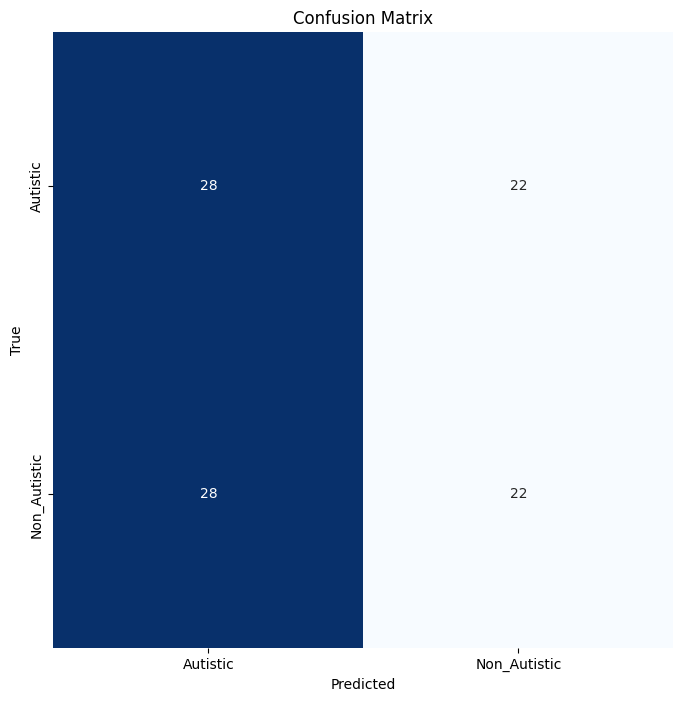

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define the paths to your train, test, and validation data
train_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/train'
test_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/test'
valid_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/valid'
consolidated_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/consolidated'

# Set up data generators with augmentation for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size according to your system capabilities
batch_size = 32

# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(consolidated_path,
                                                    target_size=(299, 299),  # InceptionV3 input size
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(299, 299),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

valid_generator = test_datagen.flow_from_directory(valid_path,
                                                   target_size=(299, 299),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

# Load InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Create a new model
model = Sequential()

# Add InceptionV3 base model
model.add(base_model)

# Add GlobalAveragePooling2D layer to reduce spatial dimensions
model.add(GlobalAveragePooling2D())

# Add a dense layer for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator),
                    epochs=25,
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True)],
                    workers=4)

# Save the model
model.save('Inceptionv3_model.h5')

# Evaluate on the test set

predictions = model.predict(valid_generator, verbose=1)
predicted_classes = np.round(predictions).flatten()


MobileNetV2

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 100 images belonging to 2 classes.
Found 2940 images belonging to 2 classes.


Epoch 1/10
92/92 [==============================] - 38s 175ms/step - loss: 0.4675 - accuracy: 0.7810 - val_loss: 6.7035 - val_accuracy: 0.5100
Epoch 2/10
92/92 [==============================] - 16s 171ms/step - loss: 0.3450 - accuracy: 0.8483 - val_loss: 0.8643 - val_accuracy: 0.7800
Epoch 3/10
92/92 [==============================] - 15s 166ms/step - loss: 0.2654 - accuracy: 0.8864 - val_loss: 2.4372 - val_accuracy: 0.7300
Epoch 4/10
92/92 [==============================] - 15s 166ms/step - loss: 0.2460 - accuracy: 0.8983 - val_loss: 2.1374 - val_accuracy: 0.6000
Epoch 5/10
92/92 [==============================] - 16s 168ms/step - loss: 0.2039 - accuracy: 0.9187 - val_loss: 3.1468 - val_accuracy: 0.5600
Epoch 6/10
92/92 [==============================] - 16s 169ms/step - loss: 0.1732 - accuracy: 0.9361 - val_loss: 2.7420 - val_accuracy: 0.5800
Epoch 7/10
92/92 [==============================] - 16s 169ms/step - loss: 0.1687 - accuracy: 0.9340 - val_loss: 5.4532 - val_accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 14s 144ms/step


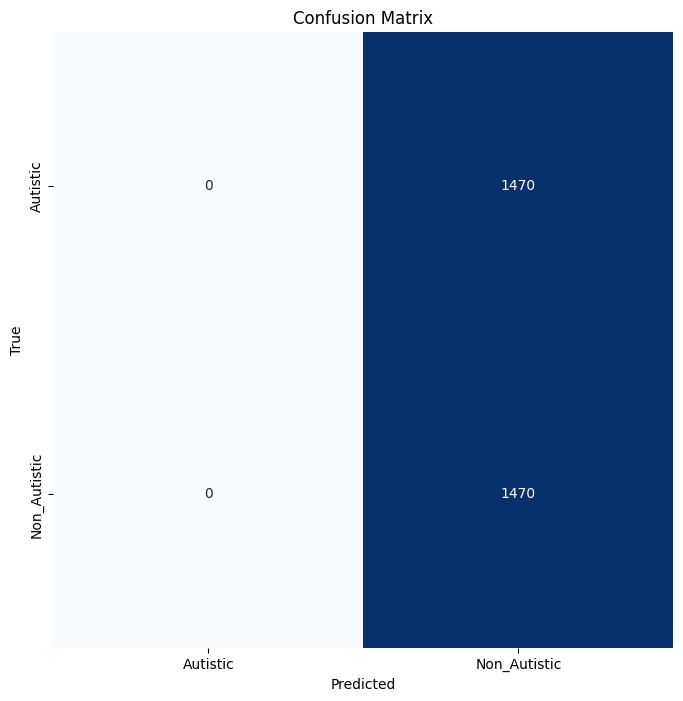

In [ ]:
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define the paths to your train, test, and validation data
train_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/train'
test_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/test'
valid_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/valid'
consolidated_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/consolidated'
# Set up data generators with augmentation for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size according to your system capabilities
batch_size = 32

# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

valid_generator = test_datagen.flow_from_directory(valid_path,
                                                   target_size=(224, 224),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

consolidated_generator = test_datagen.flow_from_directory(consolidated_path,
                                                          target_size=(224, 224),
                                                          batch_size=batch_size,
                                                          class_mode='binary')

# Load MobileNetV2 model with pre-trained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model
model = Sequential()

# Add MobileNetV2 base model
model.add(base_model)

# Add GlobalAveragePooling2D layer to reduce spatial dimensions
model.add(GlobalAveragePooling2D())

# Add a dense layer for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(consolidated_generator,
          steps_per_epoch=len(consolidated_generator),
          validation_data=valid_generator,
          validation_steps=len(valid_generator),
          epochs=10)

base_model.save('mobilenetv2_base_model.h5')

predictions = model.predict(consolidated_generator, verbose=1)
predicted_classes = np.round(predictions).flatten()


ResNet50

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 100 images belonging to 2 classes.
Found 2940 images belonging to 2 classes.
94765736/94765736 [==============================] - 3s 0us/step


Epoch 1/15
92/92 [==============================] - 79s 431ms/step - loss: 0.7312 - accuracy: 0.6793 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 2/15
92/92 [==============================] - 34s 367ms/step - loss: 0.5451 - accuracy: 0.7374 - val_loss: 1.4740 - val_accuracy: 0.5000
Epoch 3/15
92/92 [==============================] - 33s 358ms/step - loss: 0.4951 - accuracy: 0.7759 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 4/15
92/92 [==============================] - 34s 365ms/step - loss: 0.4623 - accuracy: 0.7874 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 5/15
92/92 [==============================] - 34s 365ms/step - loss: 0.4204 - accuracy: 0.8214 - val_loss: 0.8228 - val_accuracy: 0.5000
Epoch 6/15
92/92 [==============================] - 33s 357ms/step - loss: 0.3834 - accuracy: 0.8357 - val_loss: 0.7390 - val_accuracy: 0.5100
Epoch 7/15
92/92 [==============================] - 33s 360ms/step - loss: 0.3281 - accuracy: 0.8663 - val_loss: 1.0113 - val_accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 15s 158ms/step


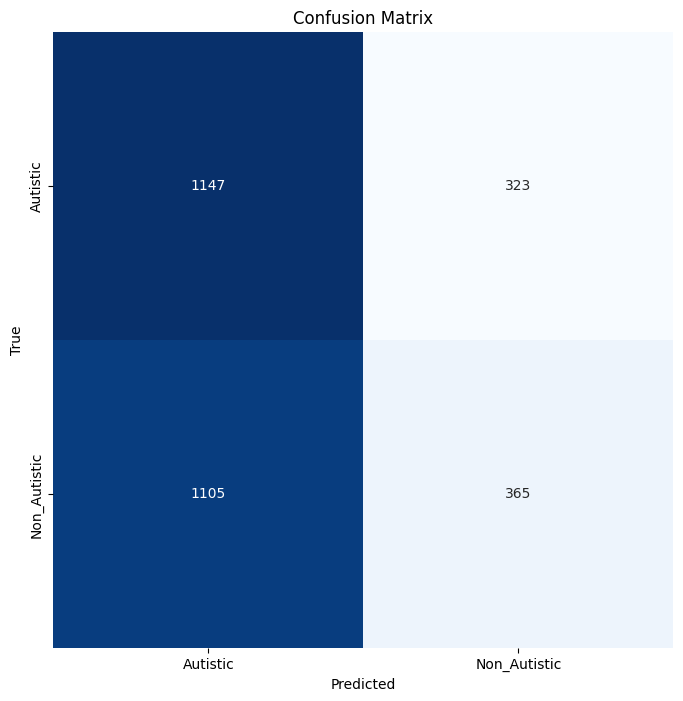

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Define the paths to your train, test, and validation data
train_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/train'
test_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/test'
valid_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/valid'
consolidated_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/consolidated'
# Set up data generators with augmentation for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size according to your system capabilities
batch_size = 32

# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

valid_generator = test_datagen.flow_from_directory(valid_path,
                                                   target_size=(224, 224),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

consolidated_generator = test_datagen.flow_from_directory(consolidated_path,
                                                          target_size=(224, 224),
                                                          batch_size=batch_size,
                                                          class_mode='binary')

# Load ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model
model = Sequential()

# Add ResNet50 base model
model.add(base_model)

# Add GlobalAveragePooling2D layer to reduce spatial dimensions
model.add(GlobalAveragePooling2D())

# Add a dense layer for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(consolidated_generator,
          steps_per_epoch=len(consolidated_generator),
          validation_data=valid_generator,
          validation_steps=len(valid_generator),
          epochs=15)
model.save('resnet_model.h5')
# Evaluate on the test set

predictions = model.predict(consolidated_generator, verbose=1)
predicted_classes = np.round(predictions).flatten()

# True labels
true_classes = consolidated_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=consolidated_generator.class_indices.keys(),
            yticklabels=consolidated_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


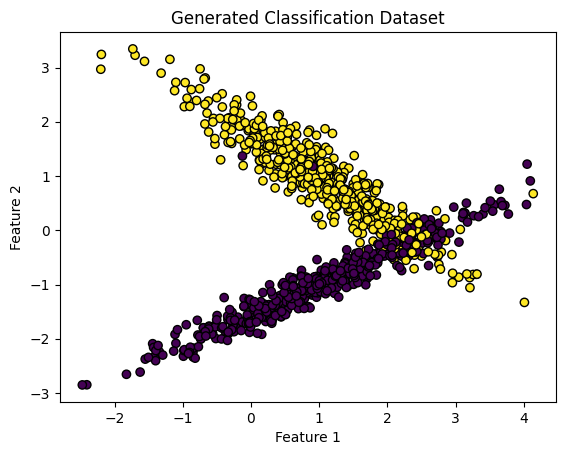

     Autism  Non-Autism  Target
0  0.601034    1.535353       1
1  0.755945   -1.172352       0
2  1.354479   -0.948528       0
3  3.103090    0.233485       0
4  0.753178    0.787514       1


In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

# Generate a random classification dataset
x, y = make_classification(
    n_samples=1000,  # Number of samples
    n_features=2,     # Number of features
    n_informative=2,  # Number of informative features (features that contribute to the target)
    n_redundant=0,    # Number of redundant features (features that are generated as random linear combinations of informative features)
    n_clusters_per_class=1,  # Number of clusters per class
    random_state=42    # Random seed for reproducibility
)

# Visualize the generated dataset
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Generated Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Create a DataFrame to store the dataset
df = pd.DataFrame(x, columns=['Autism', 'Non-Autism'])
df['Target'] = y

# Display the first few rows of the DataFrame
print(df.head())


VGG16

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 100 images belonging to 2 classes.
Found 2940 images belonging to 2 classes.


Epoch 1/20
92/92 [==============================] - 16s 162ms/step - loss: 1.1138 - accuracy: 0.6667 - val_loss: 0.4778 - val_accuracy: 0.7500
Epoch 2/20
92/92 [==============================] - 15s 164ms/step - loss: 0.4651 - accuracy: 0.7857 - val_loss: 0.4320 - val_accuracy: 0.7900
Epoch 3/20
92/92 [==============================] - 15s 167ms/step - loss: 0.4365 - accuracy: 0.8017 - val_loss: 0.4058 - val_accuracy: 0.8100
Epoch 4/20
92/92 [==============================] - 15s 164ms/step - loss: 0.3857 - accuracy: 0.8279 - val_loss: 0.3463 - val_accuracy: 0.8600
Epoch 5/20
92/92 [==============================] - 15s 164ms/step - loss: 0.3547 - accuracy: 0.8442 - val_loss: 0.3978 - val_accuracy: 0.7800
Epoch 6/20
92/92 [==============================] - 15s 163ms/step - loss: 0.3179 - accuracy: 0.8609 - val_loss: 0.2873 - val_accuracy: 0.8500
Epoch 7/20
92/92 [==============================] - 15s 164ms/step - loss: 0.2845 - accuracy: 0.8755 - val_loss: 0.2730 - val_accuracy: 0.9000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 15s 159ms/step


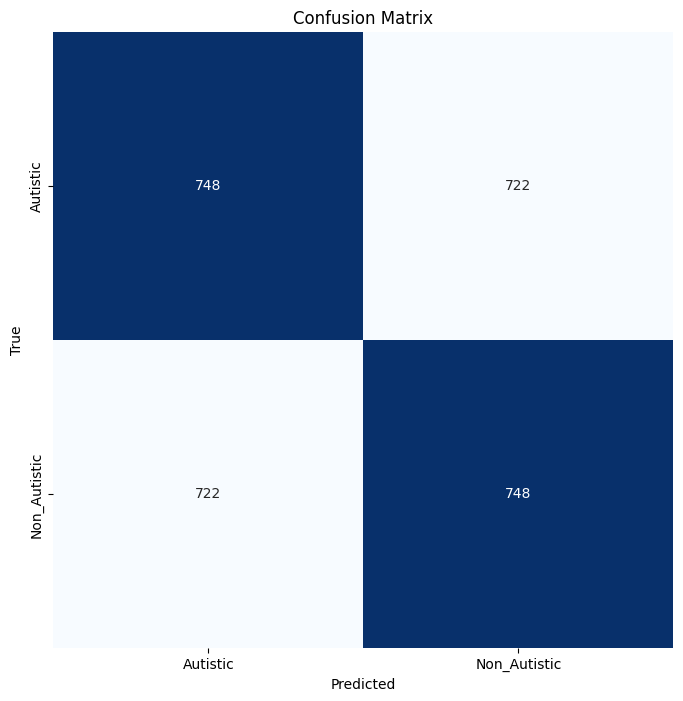

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Flatten, concatenate
from keras.applications import VGG16 as Bert
from keras.optimizers import Adam
import os
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

# Define the paths to your train, test, and validation data
train_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/train'
test_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/test'
valid_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/valid'
consolidated_path = '/content/drive/MyDrive/FinalYearProject/AutismDataset/consolidated'

# Set up data generators with augmentation for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size according to your system capabilities
batch_size = 32

# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

valid_generator = test_datagen.flow_from_directory(valid_path,
                                                   target_size=(224, 224),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

consolidated_generator = test_datagen.flow_from_directory(consolidated_path,
                                                          target_size=(224, 224),
                                                          batch_size=batch_size,
                                                          class_mode='binary')


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()


model.add(base_model)

# Add additional layers for classification
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(consolidated_generator,
          steps_per_epoch=len(consolidated_generator),
          validation_data=valid_generator,
          validation_steps=len(valid_generator),
          epochs=20)
model.save('model.h5')
predictions = model.predict(consolidated_generator, verbose=1)
predicted_classes = np.round(predictions).flatten()

# True labels
true_classes = consolidated_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=consolidated_generator.class_indices.keys(),
            yticklabels=consolidated_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Xception

Found 0 images belonging to 0 classes.
Found 20 images belonging to 2 classes.
Found 2940 images belonging to 2 classes.
83683744/83683744 [==============================] - 3s 0us/step


Epoch 1/10
92/92 [==============================] - 130s 1s/step - loss: 0.4850 - accuracy: 0.7782 - val_loss: 2.9698 - val_accuracy: 0.7000
Epoch 2/10
92/92 [==============================] - 80s 872ms/step - loss: 0.3406 - accuracy: 0.8551 - val_loss: 0.5689 - val_accuracy: 0.7000
Epoch 3/10
92/92 [==============================] - 81s 874ms/step - loss: 0.2440 - accuracy: 0.9007 - val_loss: 0.4251 - val_accuracy: 0.7000
Epoch 4/10
92/92 [==============================] - 81s 876ms/step - loss: 0.1758 - accuracy: 0.9350 - val_loss: 0.6296 - val_accuracy: 0.7000
Epoch 5/10
92/92 [==============================] - 81s 876ms/step - loss: 0.1225 - accuracy: 0.9537 - val_loss: 0.3422 - val_accuracy: 0.9000
Epoch 6/10
92/92 [==============================] - 81s 874ms/step - loss: 0.0970 - accuracy: 0.9639 - val_loss: 0.5458 - val_accuracy: 0.8500
Epoch 7/10
92/92 [==============================] - 81s 876ms/step - loss: 0.0946 - accuracy: 0.9660 - val_loss: 1.7377 - val_accuracy: 0.8000
E

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 24s 256ms/step


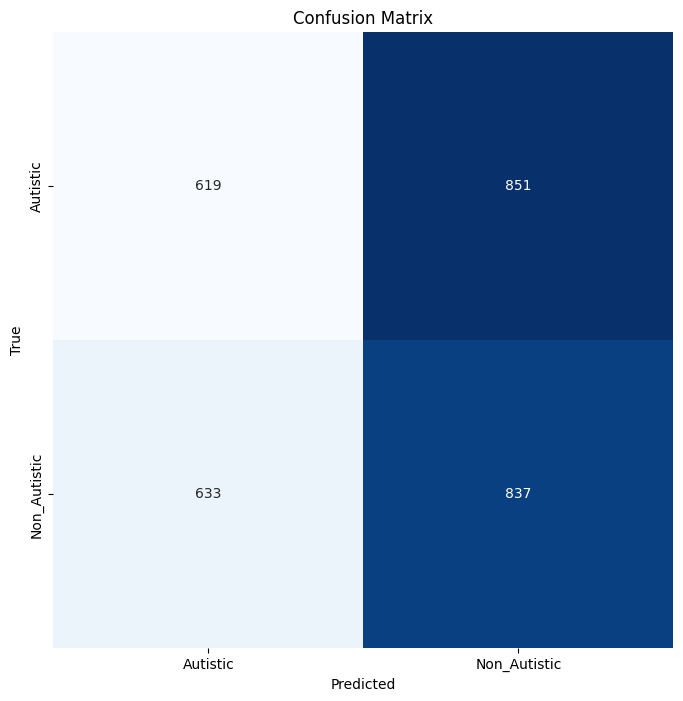

              precision    recall  f1-score   support

           0       0.49      0.42      0.45      1470
           1       0.50      0.57      0.53      1470

    accuracy                           0.50      2940
   macro avg       0.50      0.50      0.49      2940
weighted avg       0.50      0.50      0.49      2940



In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception, preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Flatten, concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
# Set the path to your dataset

data_dir = '/content/drive/MyDrive/FinalYearProject/AutismDataset'

# Set up data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)
test_datagen = ImageDataGenerator(rescale=1./255)
# Set batch size according to your system capabilities
batch_size = 32

# Generate batches of augmented data from the training set
train_generator = train_datagen.flow_from_directory(
    data_dir + '/train',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='binary',

)


# Generate batches from the validation set (no augmentation)
valid_generator = train_datagen.flow_from_directory(
    data_dir + '/valid',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Specify this is the validation set
)
consolidated_generator = test_datagen.flow_from_directory(data_dir + '/consolidated',
                                                          target_size=(299, 299),
                                                          batch_size=batch_size,
                                                          class_mode='binary')


# Create Xception base model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Create a new model
model = Sequential()

# Add Xception base model
model.add(base_model)

# Add GlobalAveragePooling2D layer to reduce spatial dimensions
model.add(GlobalAveragePooling2D())

# Add a dense layer for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using data generators
model.fit(
    consolidated_generator,
    steps_per_epoch=len(consolidated_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    epochs=10
)
model.save('xception_model.h5')

predictions = model.predict(consolidated_generator, verbose=1)
predicted_classes = np.round(predictions).flatten()

# True labels
true_classes = consolidated_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=consolidated_generator.class_indices.keys(),
            yticklabels=consolidated_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes))
